<a href="https://colab.research.google.com/github/kannursaya/ML_Algorithms/blob/main/ml_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print("Размерность:", df.shape)
print("\nПропущенные значения:\n", df.isnull().sum())
print("\nРаспределение классов:\n", df['Outcome'].value_counts())


Размерность: (768, 9)

Пропущенные значения:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Распределение классов:
 Outcome
0    500
1    268
Name: count, dtype: int64


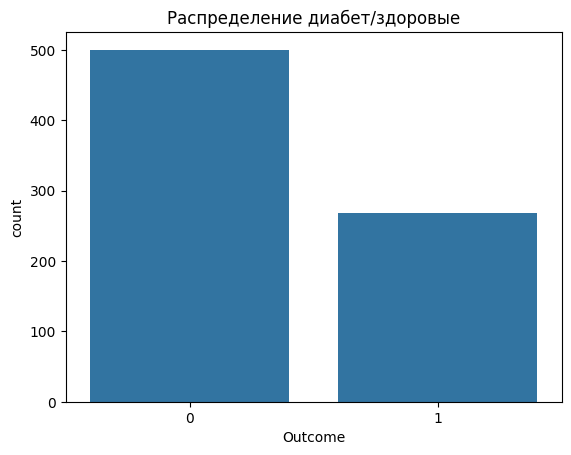

In [4]:
sns.countplot(x='Outcome', data=df)
plt.title("Распределение диабет/здоровые")
plt.show()


In [5]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


In [7]:
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred))
print("\nОтчет по классификации:\n", classification_report(y_test, y_pred))
print("Точность:", accuracy_score(y_test, y_pred))


Матрица ошибок:
 [[95 28]
 [33 36]]

Отчет по классификации:
               precision    recall  f1-score   support

           0       0.74      0.77      0.76       123
           1       0.56      0.52      0.54        69

    accuracy                           0.68       192
   macro avg       0.65      0.65      0.65       192
weighted avg       0.68      0.68      0.68       192

Точность: 0.6822916666666666


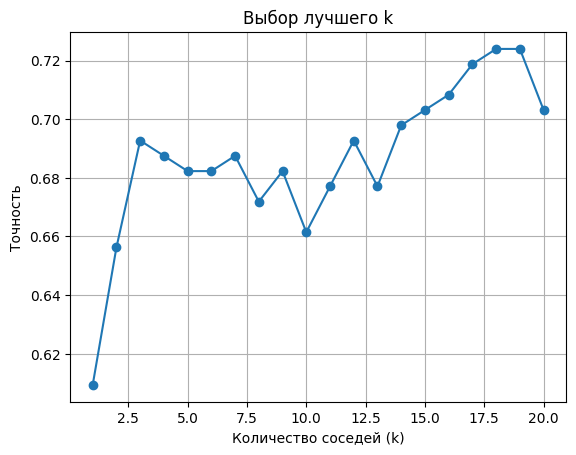

In [8]:
accuracy_list = []

for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    accuracy_list.append(acc)

plt.plot(range(1, 21), accuracy_list, marker='o')
plt.title("Выбор лучшего k")
plt.xlabel("Количество соседей (k)")
plt.ylabel("Точность")
plt.grid(True)
plt.show()
